In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from google.colab import drive
# drive.mount ('/content/drive/MyDrive')

# disney_plus_path = 'disney_plus_titles.csv'
# disney_plus_df = pd.read_csv(disney_plus_path)

# imdb_path = 'imdb_top_1000.csv'
# imdb_top_df = pd.read_csv(imdb_path)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# print("DisneyPlus Column Names:")
# print(disney_plus_df.columns.tolist())

DisneyPlus Column Names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# print("IMDB Column Names:")

IMDB Column Names:
['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


In [ ]:
#merged_df = pd.concat([disney_plus_df, imdb_top_df])
#merged_df.to_csv('merged_data.csv', index=False)

# merged_df = pd.merge(disney_plus_df, imdb_top_df, left_on='title', right_on='Series_Title', how='inner')
# merged_df.to_csv(r'raw_combined_disney_imdb.csv')

Adventure    31
Animation    27
Comedy       22
Family       13
Drama        11
Biography     7
Fantasy       7
Action        6
History       2
Romance       1
Sci-Fi        1
Sport         1
Name: Genre, dtype: int64


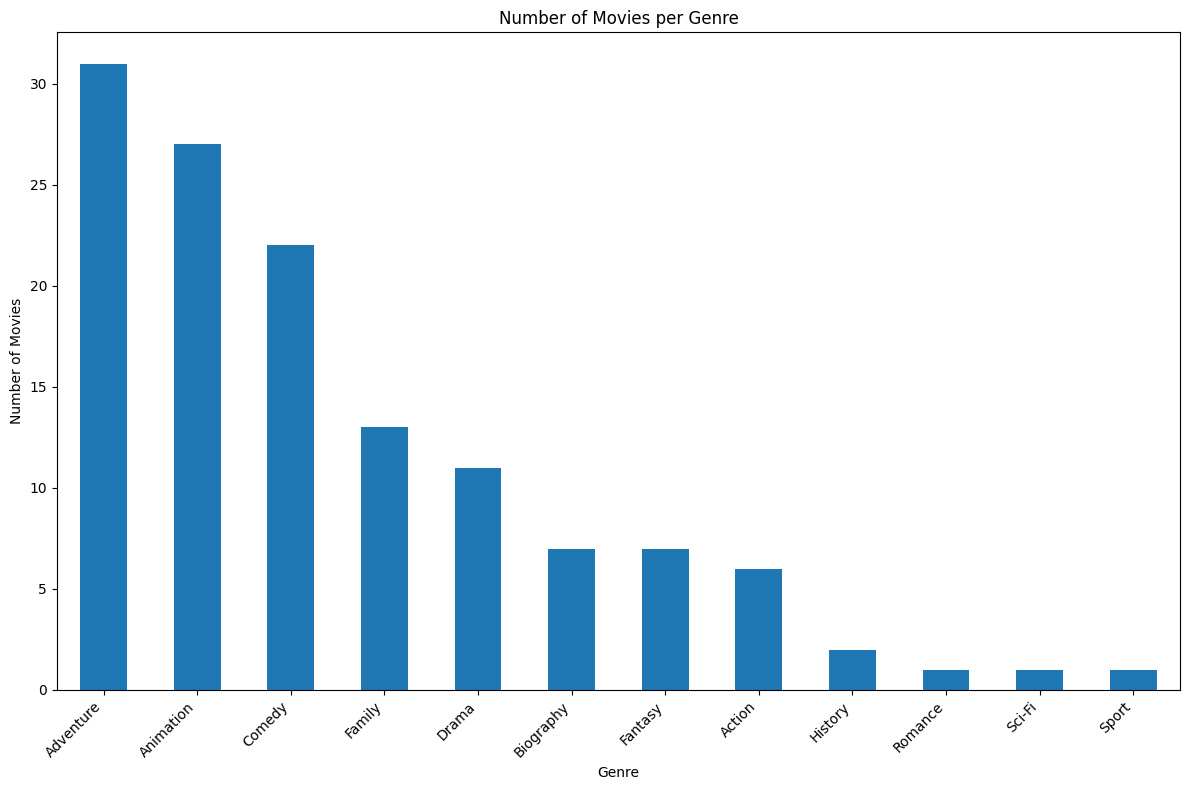

In [ ]:
# genre_counts = merged_df['Genre'].str.split(', ').explode().value_counts()
# print(genre_counts)

# # Plotting the counts as above
# plt.figure(figsize=(12, 8))
# genre_counts.plot(kind='bar')
# plt.title('Number of Movies per Genre')
# plt.xlabel('Genre')
# plt.ylabel('Number of Movies')
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()

# plt.show()

In [ ]:
# # Split into movies and TV shows
# disney_movies_only = disney_plus_df[disney_plus_df['type'] == 'Movie']
# disney_tv_shows_only = disney_plus_df[disney_plus_df['type'] == 'TV Show']

# # Output results to CSV files
# disney_movies_only.to_csv(r'disney_movies_only.csv')
# disney_tv_shows_only.to_csv(r'disney_tv_shows_only.csv')

In [ ]:
# =============================================================================
# Visualisation: Create a Plot of Number of Movies per Year & Platform on Combined Dataset
# =============================================================================

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving clean_combined_movies.csv to clean_combined_movies.csv


In [24]:
df = pd.read_csv('clean_combined_movies.csv')
df.head()

,title,country,release_year,rating,duration_min,genre,description,platform
0,Dick Johnson Is Dead,United States,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,My Little Pony: A New Generation,NaN,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Netflix
2,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Netflix
3,The Starling,United States,2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Netflix
4,Je Suis Karl,"Germany, Czech Republic",2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,Netflix


<ipython-input-25-19f9ab3e050a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='release_year', y='platform', inner='box', palette='Dark2')


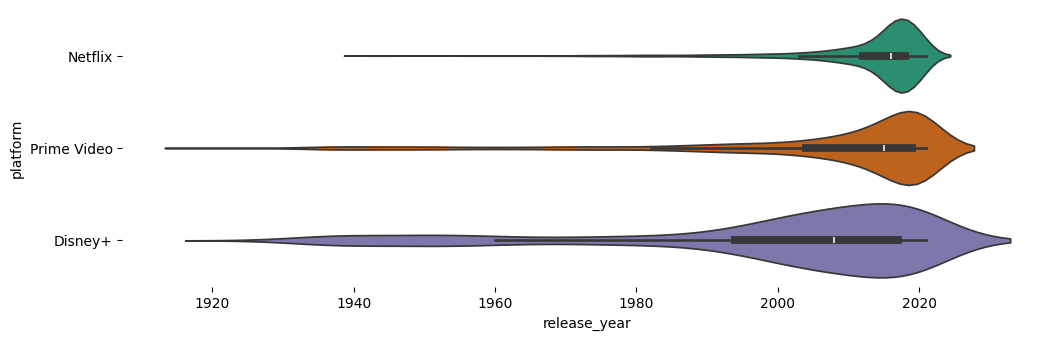

In [25]:
# @title platform vs release_year

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['platform'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='release_year', y='platform', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

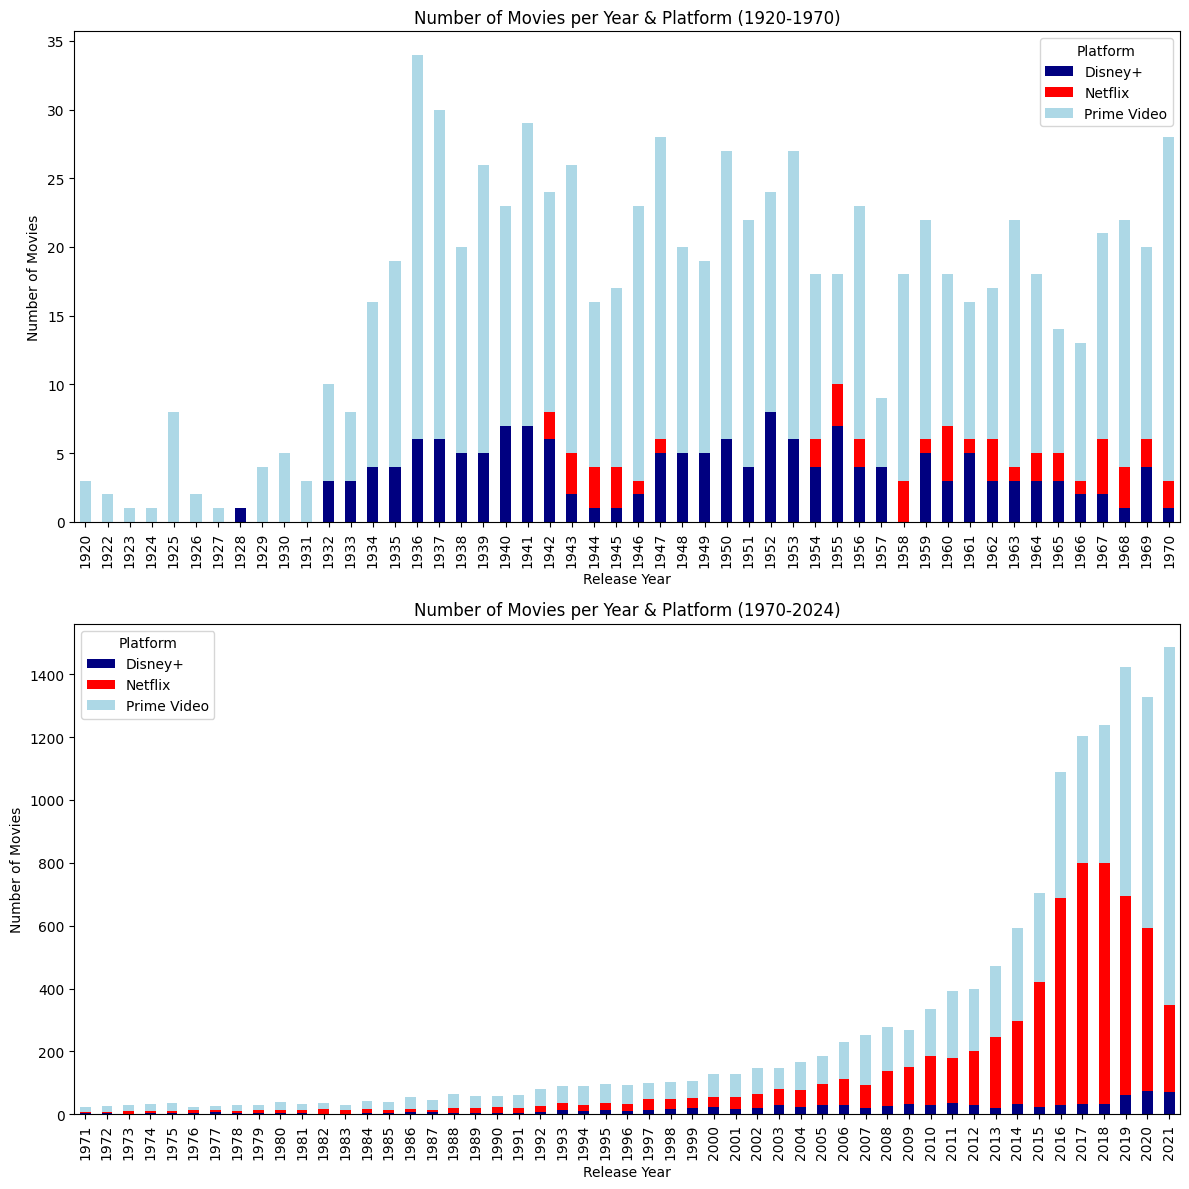

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your file is named 'clean_combined_movies.csv'
df = pd.read_csv('clean_combined_movies.csv')

# Convert 'release_year' to numeric (in case it's not already)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Count the number of movies per year and platform
movies_per_year_platform = df.groupby(['release_year', 'platform']).size().reset_index(name='count')

# Define custom colors for each platform
platform_colors = {
    'Disney+': 'navy',
    'Netflix': 'red',
    'Prime Video': 'lightblue',
    'Amazon Prime': 'lightblue'
}

# Create two DataFrames for different time ranges
df_1920_1970 = movies_per_year_platform[(movies_per_year_platform['release_year'] >= 1920) & (movies_per_year_platform['release_year'] <= 1970)]
df_1970_2024 = movies_per_year_platform[(movies_per_year_platform['release_year'] > 1970) & (movies_per_year_platform['release_year'] <= 2024)]

# Pivot the DataFrames to get stacked formats
df_1920_1970_stacked = df_1920_1970.pivot_table(index='release_year', columns='platform', values='count', fill_value=0)
df_1970_2024_stacked = df_1970_2024.pivot_table(index='release_year', columns='platform', values='count', fill_value=0)

# Create two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plot for 1920-1970
df_1920_1970_stacked.plot(kind='bar', stacked=True, color=[platform_colors[col] for col in df_1920_1970_stacked.columns], ax=axes[0])
axes[0].set_title('Number of Movies per Year & Platform (1920-1970)')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Number of Movies')
axes[0].legend(title='Platform')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 1970-2024
df_1970_2024_stacked.plot(kind='bar', stacked=True, color=[platform_colors[col] for col in df_1970_2024_stacked.columns], ax=axes[1])
axes[1].set_title('Number of Movies per Year & Platform (1970-2024)')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Number of Movies')
axes[1].legend(title='Platform')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
